In [1]:
# Helpful Python packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('./HAR-data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./HAR-data/.DS_Store
./HAR-data/reference/.DS_Store
./HAR-data/reference/BRJ-2022-12-1908.05.06-upstairs.csv
./HAR-data/reference/BRJ-2022-12-1908.09.53-walking-standing-walking-onTable.csv
./HAR-data/reference/BRJ-2022-12-1908.02.39-standing.csv
./HAR-data/reference/BRJ-2022-12-1908.03.34-walking.csv
./HAR-data/reference/BRJ-2022-12-1908.04.30-downstairs.csv
./HAR-data/reference/BRJ-2022-12-1908.05.35-walkingWithCurves.csv


In [2]:
# Select a file for the case you want to analyze
dataset = pd.read_csv("HAR-data/reference/BRJ-2022-12-1908.03.34-walking.csv", delimiter=";", decimal=",")
dataset.describe()

,time,gFx,gFy,gFz,TgF
count,4933.000000,4933.000000,4933.000000,4933.000000,4933.000000
mean,12.394004,0.058338,0.248251,0.950766,1.022002
std,7.160298,0.091711,0.239601,0.195893,0.169300
min,0.003445,-0.163900,-0.395800,0.254300,0.540000
25%,6.193621,0.000700,0.105800,0.832800,0.910000
50%,12.392788,0.043000,0.206200,0.964800,1.012000
75%,18.591363,0.095000,0.379700,1.062500,1.114000
max,24.791285,0.682300,0.985800,1.595300,1.719000


In [3]:
# Duration of acceleration record
duration = dataset['time'][dataset.index[-1]]
# Acquisition frequency
fs = dataset[ (dataset['time']>0) & (dataset['time']<1) ]['TgF'].count()
# Interval between consecutive points (milliseconds)
interval = (1/fs) * 1000
print("%.1f seconds serie, interval between consecutive points = %.1f milliseconds" % (duration, interval) )

24.8 seconds serie, interval between consecutive points = 5.0 milliseconds


In [4]:
# Set index of dataframe to be 'timestamp' column
dataset.set_index('time', inplace = True)
dataset.head()

,gFx,gFy,gFz,TgF
time,,,,
0.003445,0.0173,0.2157,0.8502,0.877
0.004591,0.0191,0.2165,0.8724,0.899
0.005380,0.0200,0.2155,0.8993,0.925
0.009800,0.0215,0.2143,0.9291,0.954
0.014770,0.0205,0.2099,0.9572,0.980


# Exploratory Data Analysis
## Time series of vibration data
Let's follow the tutorial https://machinelearningmastery.com/time-series-data-visualization-with-python/

In [5]:
# Select a subset of the vibration records
time_serie = dataset #['TgF']

## Graphics of temporal evolution: all in one graph
The next plots show the time series of the 4 accelerometers placed in the gearbox

In [ ]:
# Import Python libraries for graphical representations
import matplotlib.pyplot as plt
from pylab import rcParams

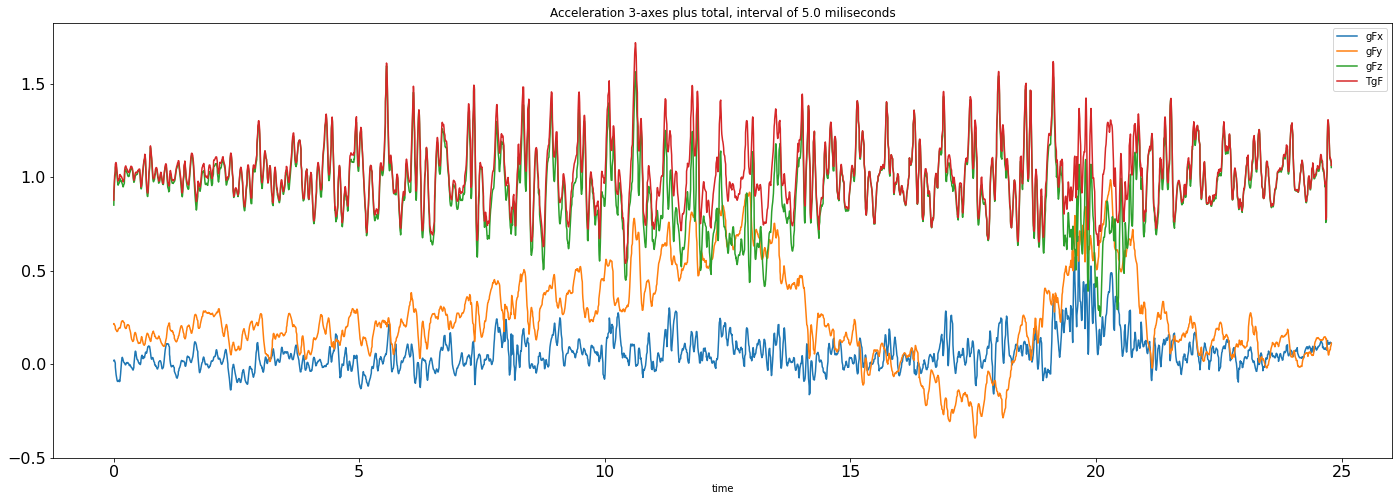

In [13]:
rcParams['figure.figsize'] = 24, 8
time_serie.plot(title="Acceleration 3-axes plus total, interval of %.1f miliseconds" %interval, fontsize=16)
plt.show()

## Histogram of the four vibration signals
Each plot shows the histogram for each of the 4 accelerations a1, a2, a3, a4

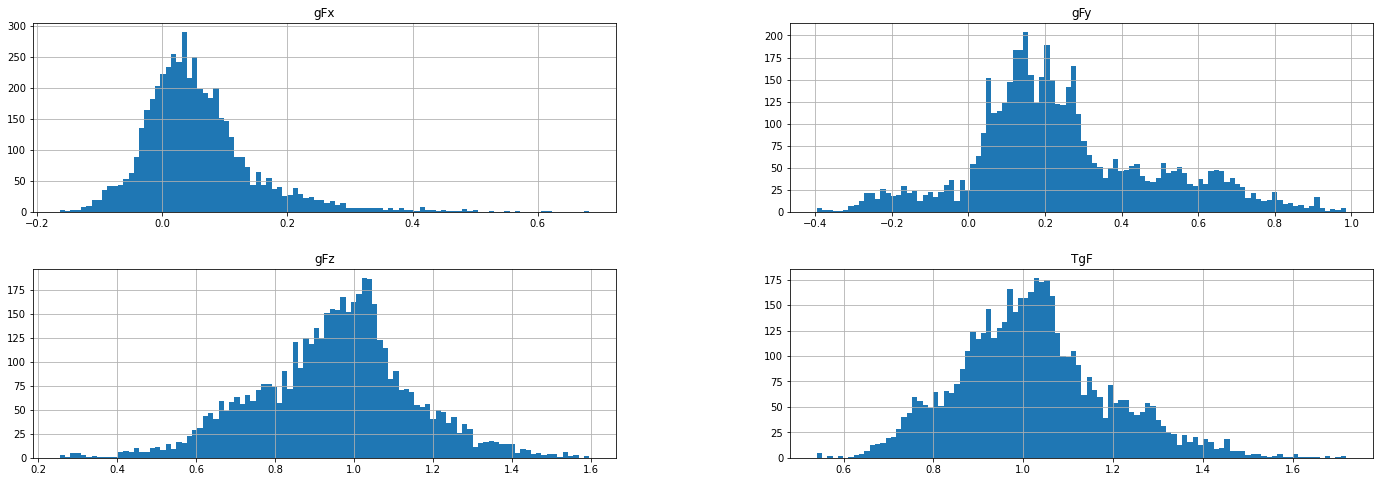

In [ ]:
time_serie.hist(bins=100)
plt.show()

## Plots of probability density functions of vibration signals
KDE Plot described as *Kernel Density Estimate* is used for visualizing the Probability Density of a continuous variable

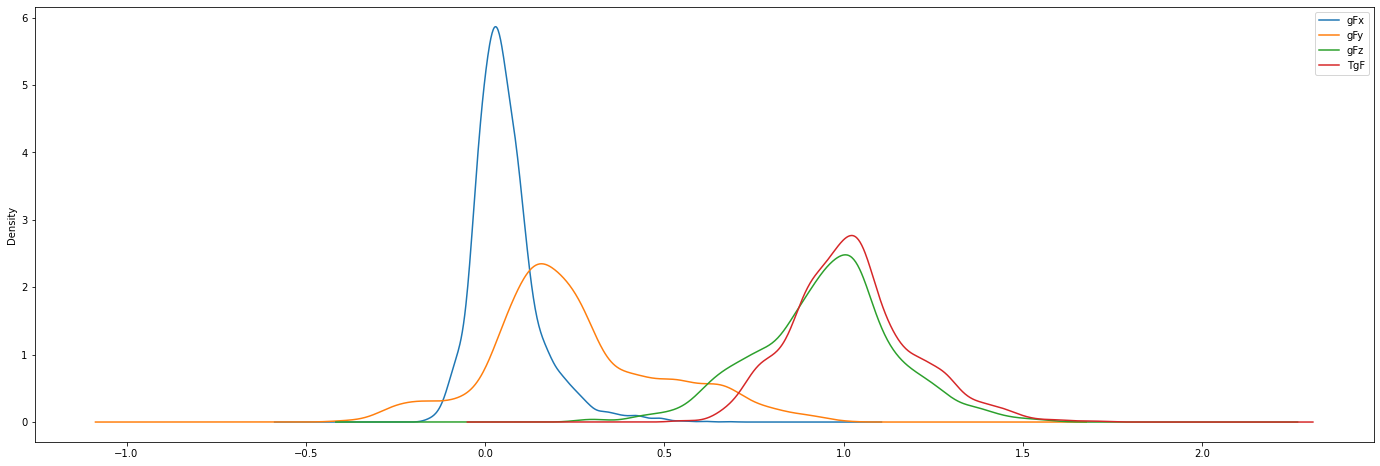

In [ ]:
time_serie.plot(kind='kde')
#plt.xlim(-3, 3)
plt.show()

## Autocorrelation for a1 vibration signal
y(t+1) vs. y(t) values

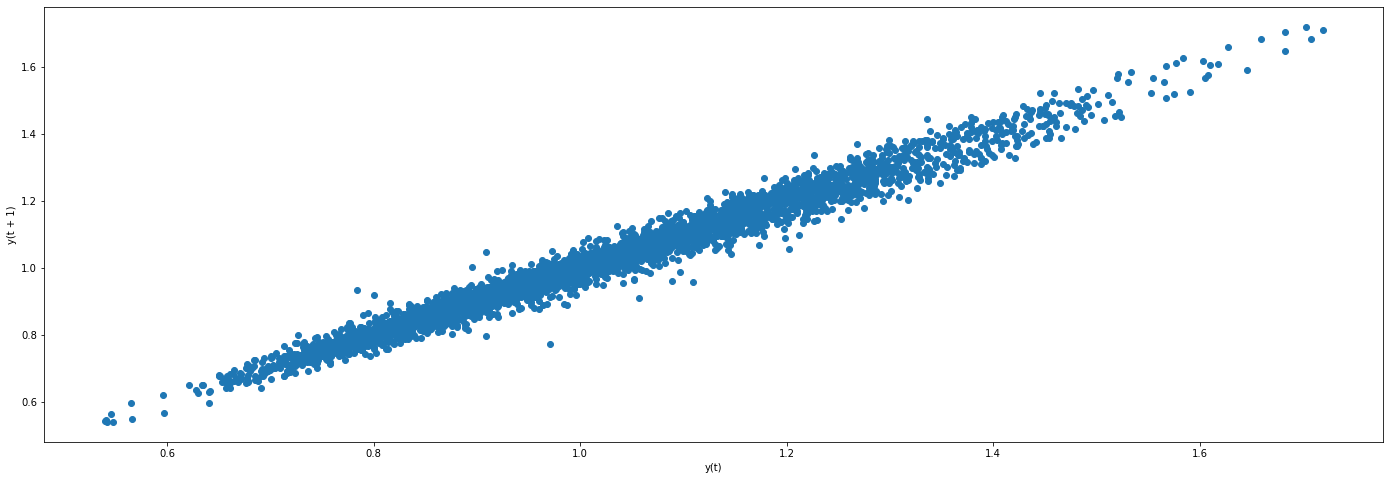

In [ ]:
from pandas.plotting import lag_plot

lag_plot(time_serie['TgF'])
plt.show()

And as a function of the lag value: y(t+lag) vs. y(t) values

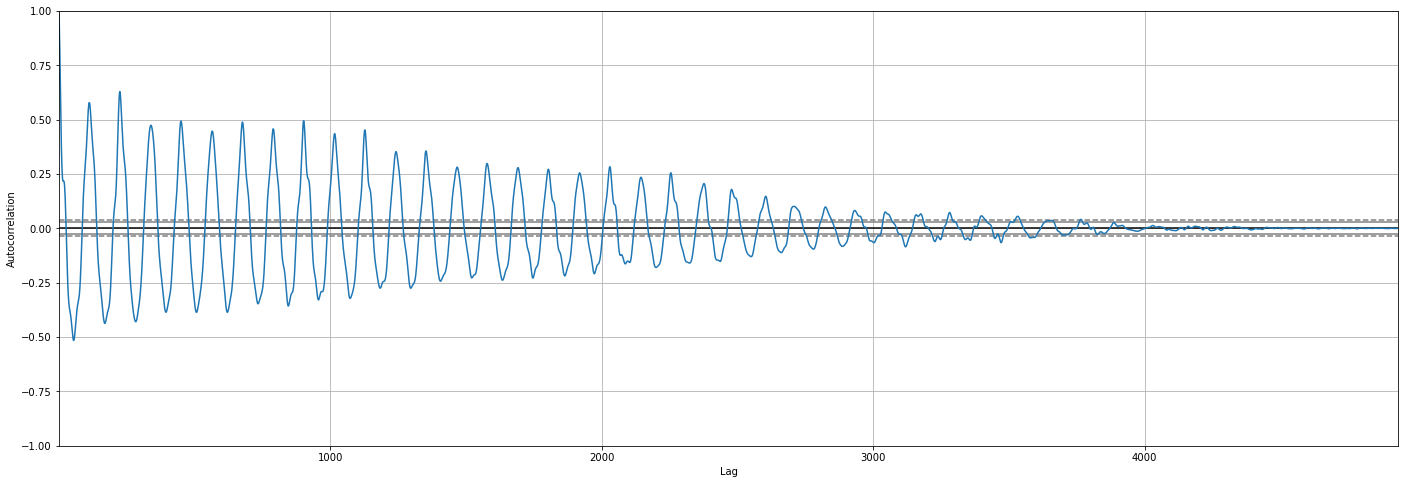

In [ ]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(time_serie['TgF'])
plt.show()